### Importing required libraries and loading dataset

In [70]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

In [3]:
import pandas as pd

df = pd.read_csv('C:/Users/Dell/Downloads/Data Science/A005_combined_dataset.csv',header=0)


### Preprocessing

#### Removing unrequired and all null columns , splitting datetime values 

In [4]:
# Remove columns where all values are either 0 or NaN
values_to_remove = [0, float('nan')]
df = df.loc[:, ~(df.isin(values_to_remove)).all()]

# Splitting datetime column to seperate date and time
datetime_column = 'Intervallbeginn (Lokalzeit)'
df[datetime_column] = pd.to_datetime(df[datetime_column])
#df['DateTime'] = df[datetime_column]
df['Date'] = df[datetime_column].dt.date
df['Time'] = df[datetime_column].dt.time

# Removing unecessary columns
#df = df.drop(df.columns[[0,3]], axis=1)
columns_to_drop = ['Anlage','Intervallbeginn (UTC)', 'Intervallbeginn (Lokalzeit)','Intervall [ms]']
df = df.drop(columns_to_drop, axis=1)

#### Removing time-interval columns

In [5]:
# Removing all time-interval columns
columns_time_interval = [col for col in df.columns if '[ms]' in col]
df = df.drop(columns_time_interval, axis=1)

In [6]:
# Saving the preprocessed Data so that above column neednt be run again
df_checkpoint=df.copy()

In [24]:
# Saving dataset for visualizing, we need full dataset , need to do further work on this for interpolation before displaying
#df_visualization = df.copy()

#### Interpolation : Removing rows that have all null values, data required for model

In [44]:
# Checking if entire row is null/NaN , if so dropping the row
# Select columns to consider (excluding 'date' and 'time')
#cols_to_consider = df.columns.difference(['date', 'time'])

# Count non-null values across the selected columns for each row
#non_null_counts = df[cols_to_consider].notna().sum(axis=1)

# Identify rows where all values in the selected columns is null
#null_rows = non_null_counts[non_null_counts == 0].index

# Drop these null rows from the DataFrame and save it for training
#df.drop(null_rows, inplace=True)

# Rows that are completely null
#null_rows_df = df.loc[null_rows]

# Interpolation
#df[cols_to_consider] = df[cols_to_consider].interpolate(method='spline', order=2)

### Trend Analysis

In [11]:
number_of_Days = len(df.Date.unique())
print("Total number of Days: ", number_of_Days)
no_of_Records = len(df.Time.unique())
print("Total number of Records each Day: ", no_of_Records)
print("Total no data in Dataset: ", number_of_Days*no_of_Records)

Total number of Days:  730
Total number of Records each Day:  1440
Total no data in Dataset:  1051200


In [12]:
df.head()

,A53_M5_3007 (Belegungen/Intervall),D11 (Belegungen/Intervall),D12 (Belegungen/Intervall),D21 (Belegungen/Intervall),D31 (Belegungen/Intervall),D41 (Belegungen/Intervall),D42 (Belegungen/Intervall),H53_M3_3006 (Belegungen/Intervall),H53_M6_1140 (Belegungen/Intervall),H57_M1_1137 (Belegungen/Intervall),Date,Time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-01-06,00:00:00
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2021-01-06,00:01:00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-01-06,00:02:00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-01-06,00:03:00
4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2021-01-06,00:04:00


#### Entire Dataset

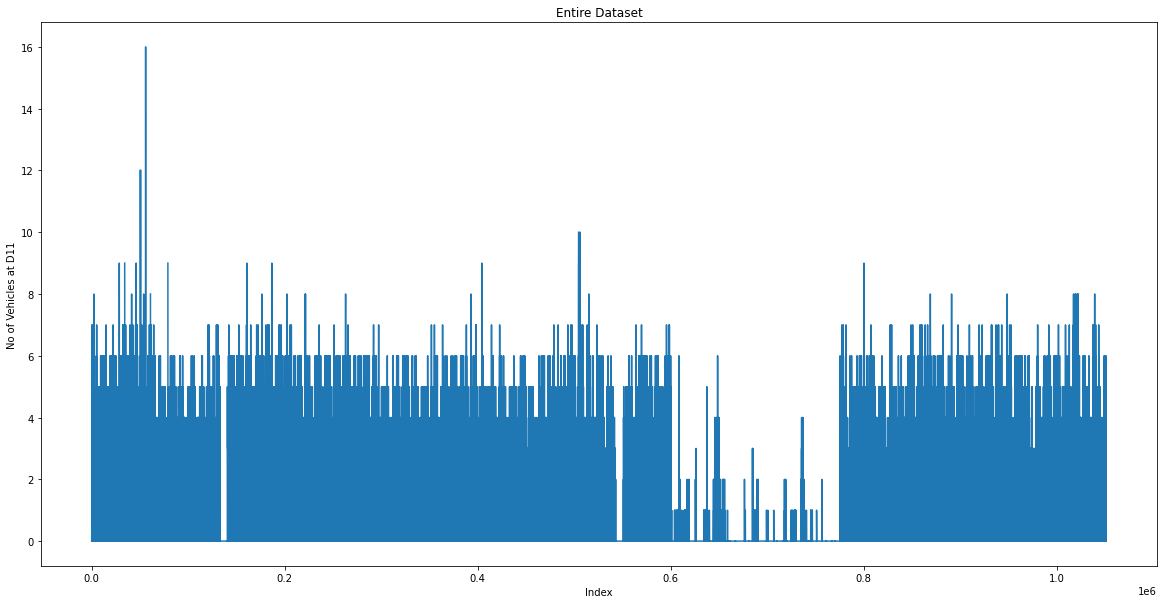

In [23]:
plt.figure(figsize=(20,10))
plt.plot(df.index, df['D11 (Belegungen/Intervall)'])
plt.title('Entire Dataset')
plt.xlabel('Index')
plt.ylabel('No of Vehicles at D11');
#plt.show(block=False)

There is some irregularity , especially around 0.7*10^6.No further observations can be made here, so further analysis required to detect if this is just a seasonal effect.

#### Annual Data

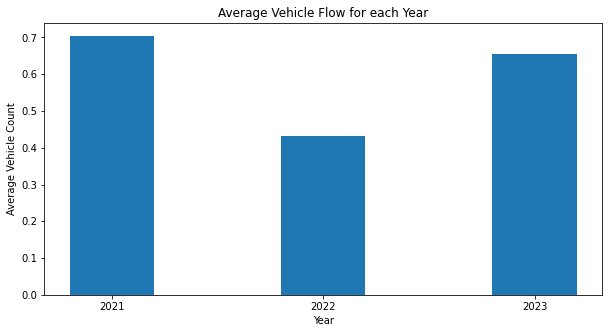

In [31]:
avg_Annual_Data = df.copy()  # Make a copy of the DataFrame
avg_Annual_Data['Year'] = df['Date'].apply(lambda x: datetime.strftime(x, '%Y'))
avg_Annual_Data = avg_Annual_Data.groupby('Year', as_index=False)['D11 (Belegungen/Intervall)'].mean()

# Create the bar chart
plt.figure(figsize=(10, 5))
plt.bar(avg_Annual_Data['Year'], avg_Annual_Data['D11 (Belegungen/Intervall)'], width=0.4)
plt.title('Average Vehicle Flow for each Year')
plt.xlabel('Year')
plt.ylabel('Average Vehicle Count')
plt.show()

No hypothesis can be made, as it first decreases and then increases, unclear trend

#### Daily Trends

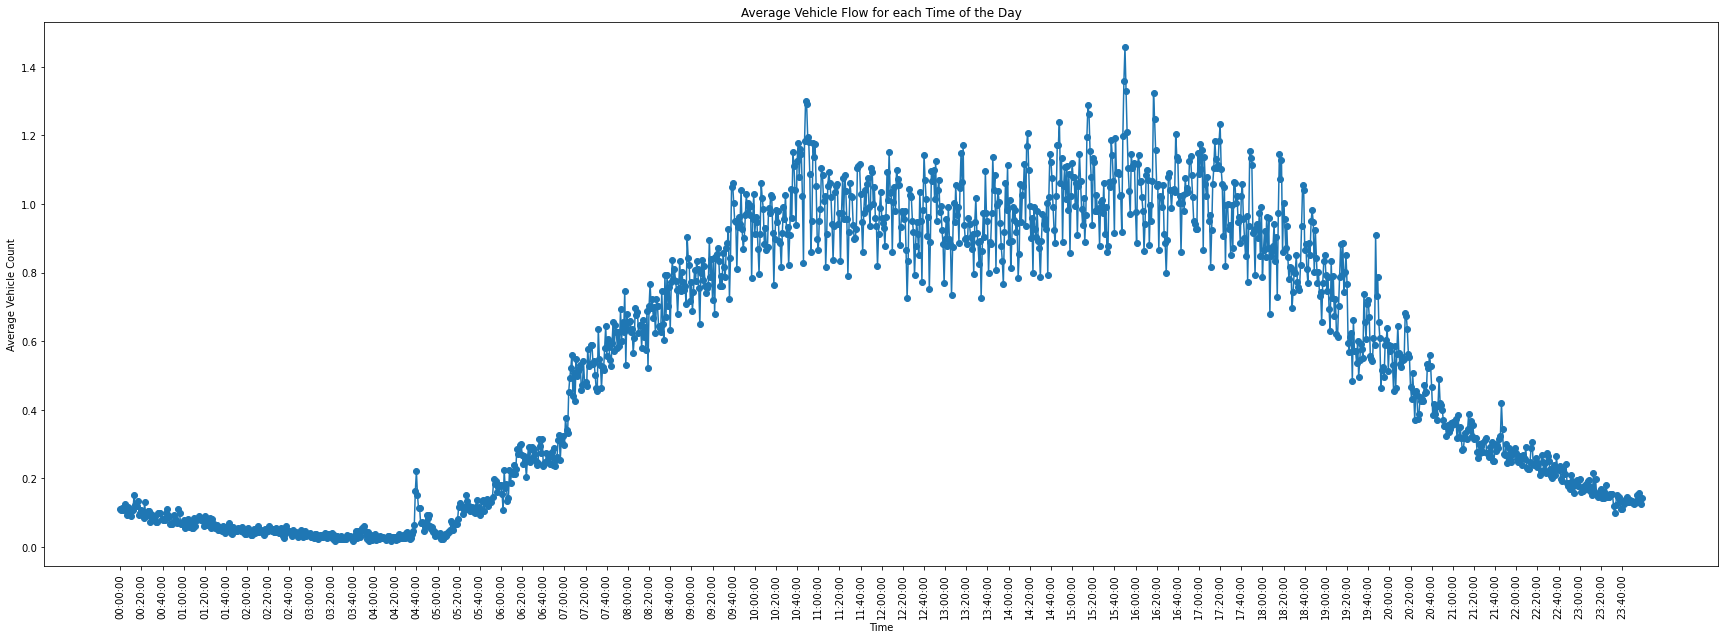

In [41]:
Time_Period_Data = df.copy()
Time_Period_Data = df.groupby('Time', as_index=False)['D11 (Belegungen/Intervall)'].mean()
# Convert the 'Time' column to strings
Time_Period_Data['Time'] = Time_Period_Data['Time'].apply(lambda x: x.strftime('%H:%M:%S'))

# Create the line chart
plt.figure(figsize=(30, 10))
plt.plot(Time_Period_Data['Time'], Time_Period_Data['D11 (Belegungen/Intervall)'], marker='o')

plt.xticks(rotation='vertical')
plt.xticks(range(0, len(Time_Period_Data['Time']), 20), Time_Period_Data['Time'][::20])

plt.title('Average Vehicle Flow for each Time of the Day')
plt.xlabel('Time')
plt.ylabel('Average Vehicle Count')
#plt.grid(True)
plt.show()

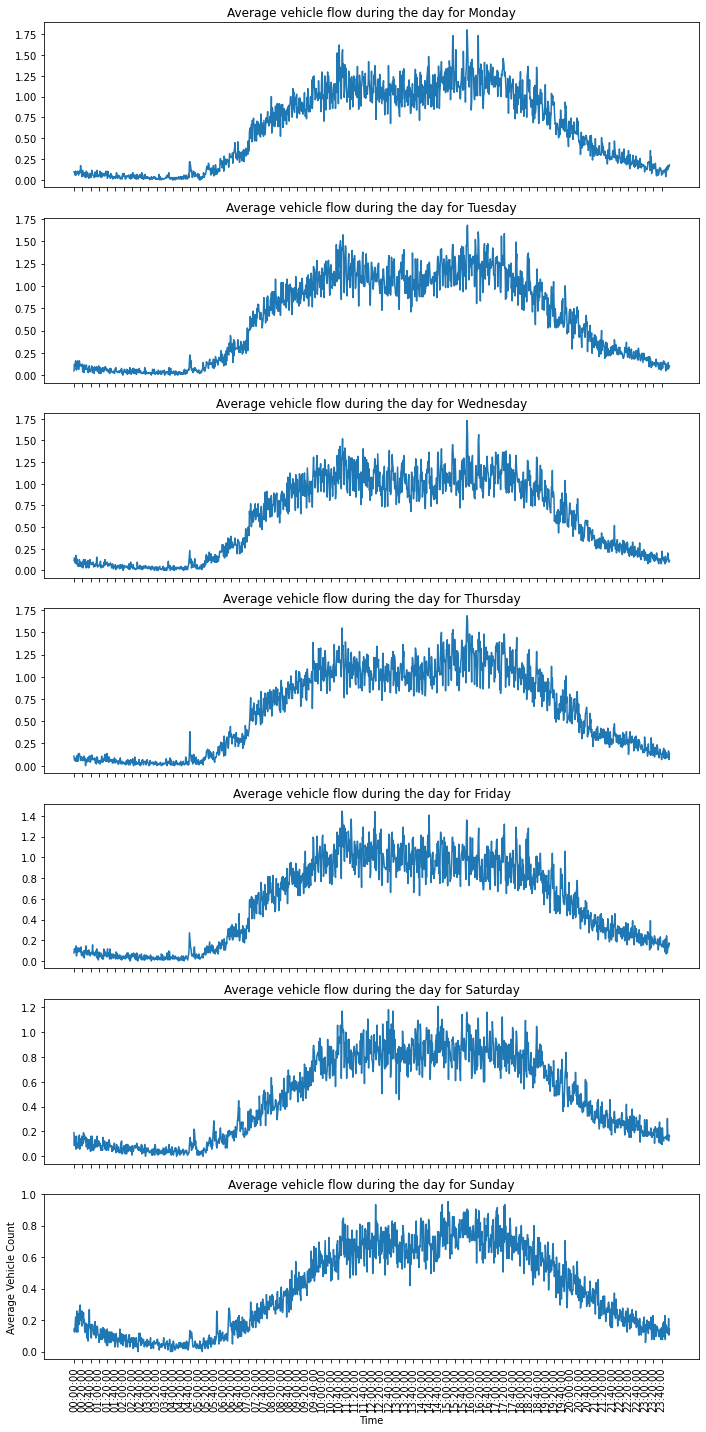

In [53]:
dayList = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekDay_Avg_Data = df.copy()
weekDay_Avg_Data['Time'] = weekDay_Avg_Data['Time'].apply(lambda x: x.strftime('%H:%M:%S'))
weekDay_Avg_Data['Day'] = weekDay_Avg_Data['Date'].apply(lambda x: datetime.strftime(x, '%A'))
weekDay_Avg_Data = weekDay_Avg_Data.groupby(['Day', 'Time'], as_index=False).mean()

fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 20), sharex=True)  # Create subplots

for i, day in enumerate(dayList):
    data_Weekly = weekDay_Avg_Data[weekDay_Avg_Data['Day'] == day]
    ax = axes[i]  # Get the current subplot
    ax.set_title('Average vehicle flow during the day for ' + day)
    
    ax.plot(data_Weekly['Time'], data_Weekly['D11 (Belegungen/Intervall)'])
    ax.set_xticks(data_Weekly['Time'].unique()) # set x axis
    #ax.set_xticks([])  # Hide x-axis labels for better readability
    
    #ax.scatter(data_Weekly['Time'], data_Weekly['D11 (Belegungen/Intervall)'], c='orange')
    #ax.set_xticks(data_Weekly['Time'].unique()) # set x axis
    #ax.tick_params(labelrotation=90)


plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots
plt.xlabel('Time')
plt.ylabel('Average Vehicle Count')
plt.xticks(rotation='vertical')
plt.xticks(range(0, len(Time_Period_Data['Time']), 20), Time_Period_Data['Time'][::20])
plt.tight_layout()
plt.show()

In the first graph, we see the seasonality of the dataset during different times of the day.

In the following plots, we see that this trend remains almost the same for every day of the week. So, we can safely assume that there is a seasonality on the basis of different time of the day.

#### Weekly seasonality

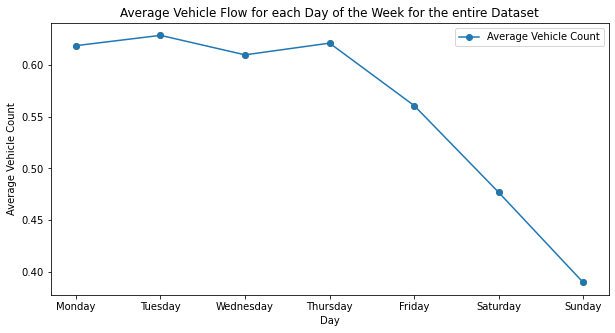

In [68]:
avg_Day_of_Week = df.copy()
avg_Day_of_Week['Day'] = avg_Day_of_Week['Date'].apply(lambda x: datetime.strftime(x, '%A'))
avg_Day_of_Week = avg_Day_of_Week.groupby(['Day'], as_index=False).mean()

# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Reorder the DataFrame based on day_order
avg_Day_of_Week['Day'] = pd.Categorical(avg_Day_of_Week['Day'], categories=day_order, ordered=True)
avg_Day_of_Week = avg_Day_of_Week.sort_values('Day')


plt.figure(figsize=(10, 5))
plt.plot(avg_Day_of_Week['Day'], avg_Day_of_Week['D11 (Belegungen/Intervall)'], marker='o', label='Average Vehicle Count')
plt.scatter(avg_Day_of_Week['Day'], avg_Day_of_Week['D11 (Belegungen/Intervall)'], c='orange')
plt.xticks(rotation='horizontal')
plt.title('Average Vehicle Flow for each Day of the Week for the entire Dataset')
plt.xlabel('Day')
plt.ylabel('Average Vehicle Count')
plt.legend()
plt.show()

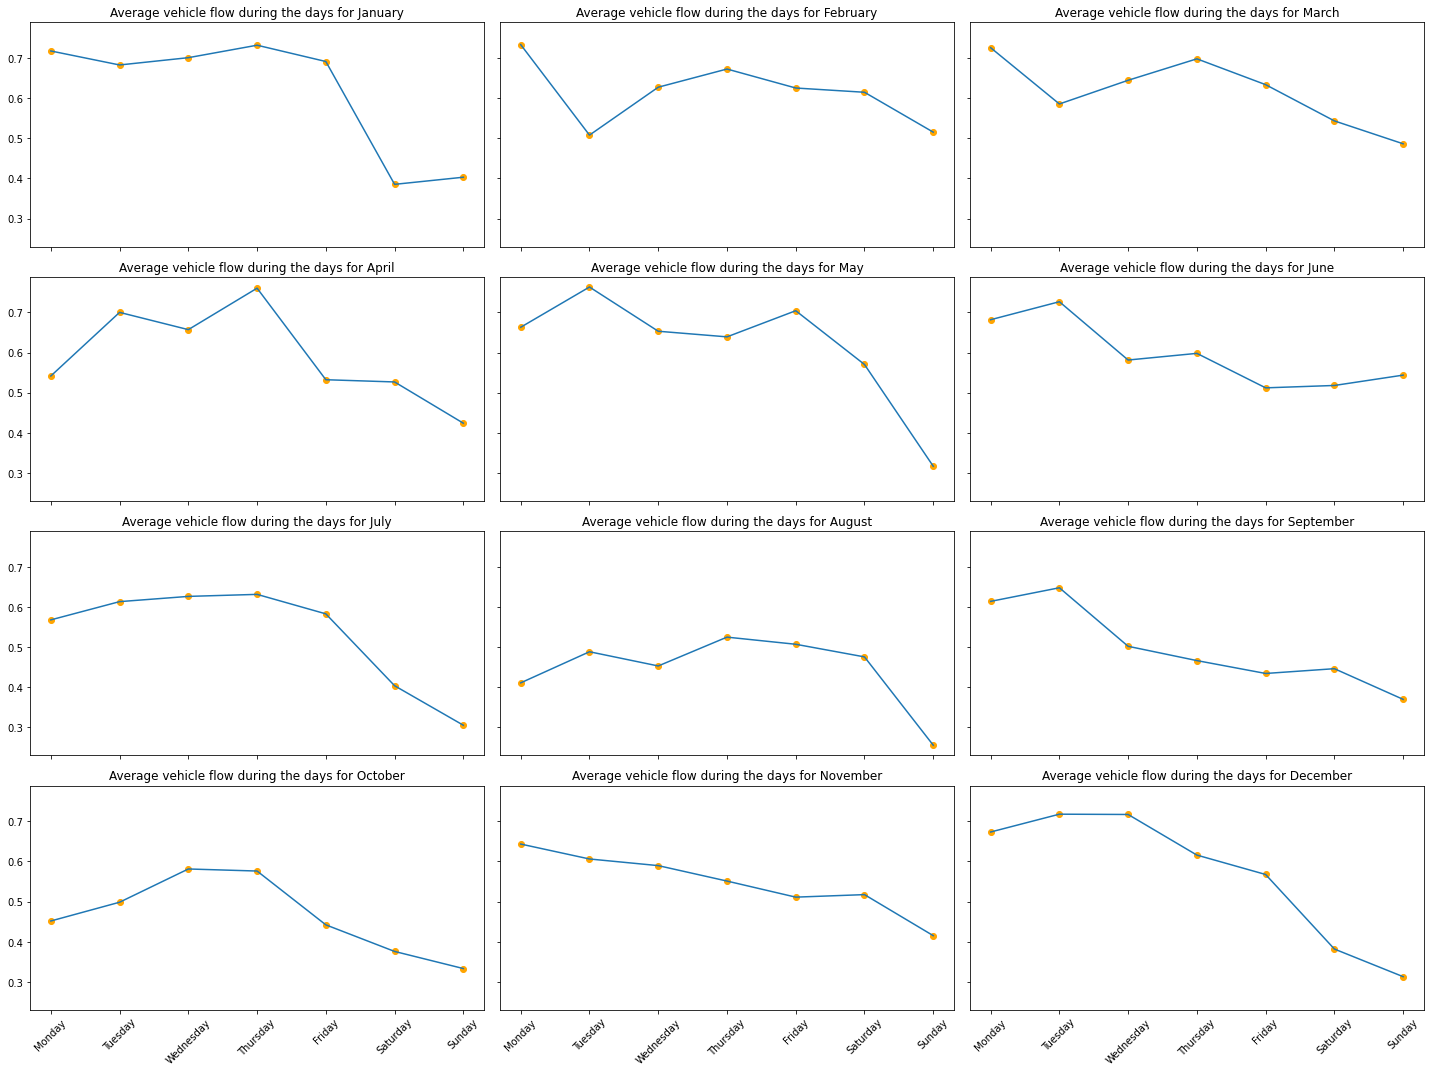

In [63]:
# Define month names and month numbers
month_Num = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
month_List = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Copy the DataFrame
mth_Avg_Day_Of_Week = df.copy()

# Extract day of the week (0-6) and month (01-12)
mth_Avg_Day_Of_Week['Day'] = mth_Avg_Day_Of_Week['Date'].apply(lambda x: x.weekday())
mth_Avg_Day_Of_Week['Month'] = mth_Avg_Day_Of_Week['Date'].apply(lambda x: datetime.strftime(x, '%m'))

# Group by 'Month' and 'Day' and calculate the mean
mth_Avg_Day_Of_Week = mth_Avg_Day_Of_Week.groupby(['Month', 'Day'], as_index=False).mean()

# Rename 'Day' column to use day names instead of numbers
mth_Avg_Day_Of_Week['Day'] = mth_Avg_Day_Of_Week['Day'].apply(lambda x: dayList[x])

# Create subplots for each month
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15), sharex=True, sharey=True)

for i, month_num in enumerate(month_Num):
    dataMonthly = mth_Avg_Day_Of_Week[mth_Avg_Day_Of_Week['Month'] == month_num]
    ax = axes[i // 3, i % 3]  # Get the current subplot
    ax.set_title('Average vehicle flow during the days for ' + month_List[i])
    ax.plot(dataMonthly['Day'], dataMonthly['D11 (Belegungen/Intervall)'])
    ax.scatter(dataMonthly['Day'], dataMonthly['D11 (Belegungen/Intervall)'], c='orange')
    ax.set_xticks(dataMonthly['Day'].unique())
    ax.set_xticklabels(dayList, rotation=45)  # Label x-axis with day names

plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots
plt.tight_layout()
plt.show()

In the first graph, we see the seasonality of the entire dataset during different days of the week.

In the following plots, we see that this trend remains almost the same for every month of the year. So, we can safely assume that there is a seasonality on the basis of different days of the week. (We also see that the dip on Sunday is not too much for June, Summer effect? )

#### Annual Seasonality

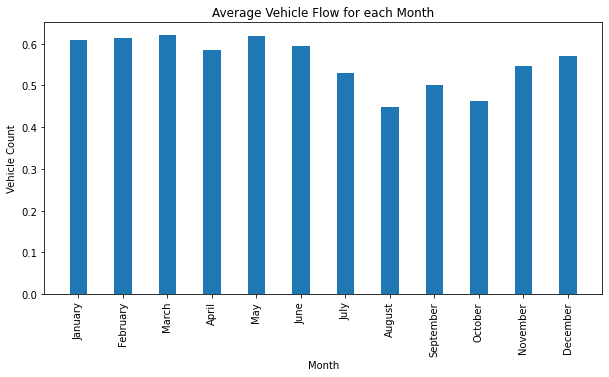

In [73]:
month_Avg_Data = df.copy()
month_Avg_Data['Month'] = month_Avg_Data['Date'].apply(lambda x: datetime.strftime(x, '%m'))
month_Avg_Data = month_Avg_Data.groupby(['Month'], as_index=False).mean()

# Define month names and month numbers
month_Num = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
month_List = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 5))
plt.bar(month_Avg_Data['Month'], month_Avg_Data['D11 (Belegungen/Intervall)'], width=0.4)

# Set the x-axis ticks to use month names
plt.xticks(month_Num, month_List, rotation='vertical')

plt.title('Average Vehicle Flow for each Month')
plt.xlabel('Month')
plt.ylabel('Vehicle Count')
plt.show()

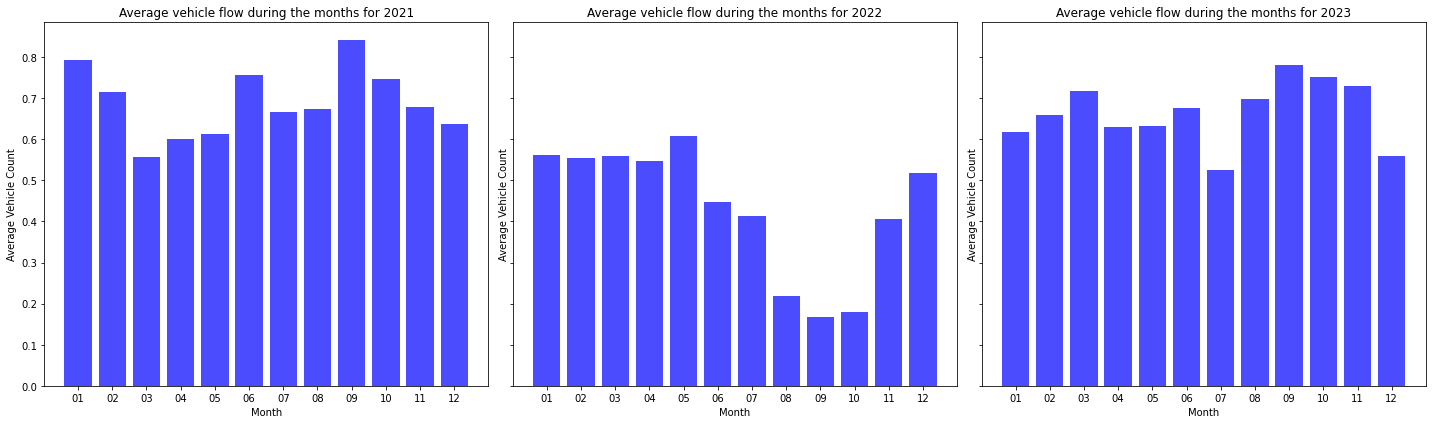

In [79]:
yearList = ['2021', '2022', '2023']  # Hardcoded, applies only to this dataset

month_PerYear_Avg = df.copy()
month_PerYear_Avg['Month'] = month_PerYear_Avg['Date'].apply(lambda x: datetime.strftime(x, '%m'))
month_PerYear_Avg['Year'] = month_PerYear_Avg['Date'].apply(lambda x: datetime.strftime(x, '%Y'))
month_PerYear_Avg = month_PerYear_Avg.groupby(['Year', 'Month'], as_index=False).mean()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6), sharey=True)

for i, year in enumerate(yearList):
    dataYearly = month_PerYear_Avg[month_PerYear_Avg['Year'] == year]
    ax = axes[i]  # Get the current subplot
    ax.set_title('Average vehicle flow during the months for ' + year)
    ax.bar(dataYearly['Month'], dataYearly['D11 (Belegungen/Intervall)'], color='blue', alpha=0.7)
    ax.set_xlabel('Month')
    ax.set_ylabel('Average Vehicle Count')

plt.tight_layout()
plt.show()

There is annual seasonality